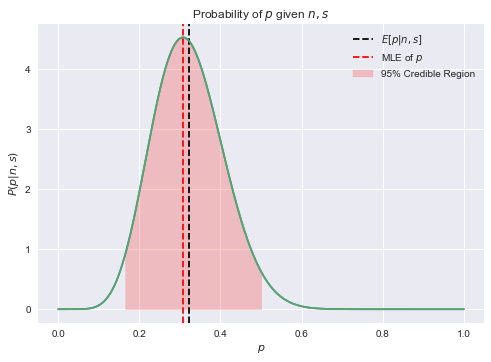

In [9]:
import matplotlib.pyplot as plt; plt.style.use('seaborn')
import numpy as np
from scipy.special import factorial as fact
from scipy import integrate


trials = np.array([
    1, 1, 1, 1, 1,
    1, 1, 0, 1, 1,
    1, 1, 0, 0, 1,
    1, 0, 0, 1, 1,
    1, 0, 0, 1, 0,
    1
])

n = len(trials)
s = n - trials.sum()

def p_posterior(p, n, s):
    q = 1 - p
    return (fact(n + 1) / (fact(s) * fact(n - s))) * (p ** s) * (q ** (n - s))

def posterior_expectation(n, s):
    def f(p):
        return p * p_posterior(p, n, s)
    return integrate.quad(f, 0, 1)[0]

p = np.linspace(0, 1, num=1000)

plt.title('Probability of $p$ given $n,s$')
plt.gca().set(xlabel='$p$', ylabel='$P(p|n,s)$')

post_samples = p_posterior(p, n, s)
plt.plot(p, post_samples)
E_p = posterior_expectation(n, s)
plt.gca().axvline(E_p, color='k', ls='--', label='$E[p|n,s]$')

plt.gca().axvline(s / n, color='r', ls='--', label='MLE of $p$')

cdf = np.cumsum(post_samples / post_samples.sum())
idx = (.025 <= cdf) & (cdf <= 0.975)
plt.fill_between(p[idx], p_posterior(p[idx], n, s), color='r', alpha=0.2,
                 label='95% Credible Region')

import scipy.stats as ss
plt.plot(p, ss.beta(s+1, n-s+1).pdf(p))

plt.gca().legend()

plt.savefig('how-much-longer.png')

In [2]:
np.quantile(post_samples / post_samples.mean(), [0.1, 0.9])

array([7.55007915e-12, 3.88066018e+00])

In [3]:
def posterior_expectation(n, s):
    def f(p):
        return p_posterior(p, n, s)
    return integrate.quad(f, .18, .45)[0]
posterior_expectation(n, s)

0.8813519248422197

In [4]:
posterior_expectation(n, s)

0.8813519248422197

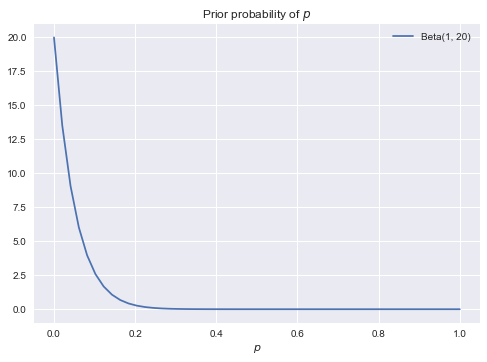

In [5]:
import scipy.stats as ss

α, β = 1, 20

x = np.linspace(0, 1)
beta_pdf = ss.beta(α, β).pdf(x)
plt.title('Prior probability of $p$')
plt.gca().set(xlabel='$p$')
plt.plot(x, beta_pdf, label=f'Beta({α}, {β})')
plt.gca().legend()
plt.savefig('beta-pdf.png')

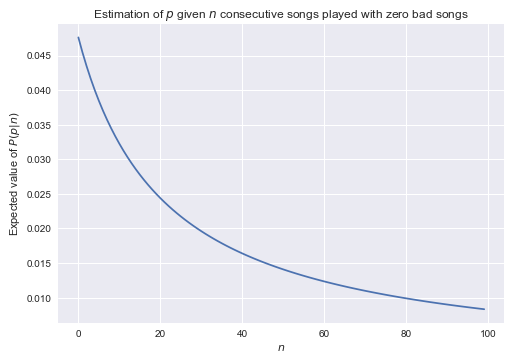

In [6]:
@np.vectorize
def beta_binomial(n):
    return α / (n + α + β)

n = np.arange(100)
plt.title('Estimation of $p$ given $n$ consecutive songs played with zero bad songs')
plt.gca().set(
    xlabel='$n$',
    ylabel='Expected value of $P(p|n)$')
plt.plot(n, beta_binomial(n))
plt.savefig('beta.png')